# YOLO11 Training - BDD100K Road Object Detection

**Configuration:**
- Model: YOLO11s (small)
- Image Size: 640x640 (standard YOLO size)
- Batch: 8
- Gradient Accumulation: nbs=16 (effective batch = 16)
- Epochs: 100 with early stopping
- Hardware: RTX 4060 8GB VRAM

## 1. Environment Setup & GPU Verification

In [1]:
# Check GPU availability
import torch

print("="*50)
print("GPU Information")
print("="*50)

print(f"PyTorch: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU count: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"  GPU {i}: {torch.cuda.get_device_name(i)}")
        props = torch.cuda.get_device_properties(i)
        print(f"    Memory: {props.total_memory / 1024**3:.1f} GB")
else:
    print("WARNING: CUDA not available! Training will be very slow on CPU.")

c:\ProgramData\anaconda3\Lib\site-packages\torch\cuda\__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


GPU Information
PyTorch: 2.9.1+cu128
CUDA available: True
CUDA version: 12.8
GPU count: 1
  GPU 0: NVIDIA GeForce RTX 4060
    Memory: 8.0 GB


In [2]:
# Verify dataset structure
from pathlib import Path

BASE_DIR = Path(r"c:\My Projects\road-object-detection")
DATASET_DIR = BASE_DIR / "dataset"
DATA_YAML = BASE_DIR / "data.yaml"

print("="*50)
print("Dataset Structure Verification")
print("="*50)

# Check each split
for split in ['train', 'val', 'test']:
    img_dir = DATASET_DIR / "images" / split
    lbl_dir = DATASET_DIR / "labels" / split
    img_count = len(list(img_dir.glob("*.jpg")))
    lbl_count = len(list(lbl_dir.glob("*.txt")))
    print(f"{split.upper()}: {img_count} images, {lbl_count} labels")

# Display data.yaml
if DATA_YAML.exists():
    with open(DATA_YAML, 'r') as f:
        print("\n--- data.yaml ---")
        print(f.read())
else:
    print("ERROR: data.yaml not found!")

Dataset Structure Verification
TRAIN: 60000 images, 60000 labels
VAL: 8571 images, 8571 labels
TEST: 17143 images, 17143 labels

--- data.yaml ---
# BDD100K Dataset Configuration for YOLO11 Training
# Dataset path (relative to this file or absolute)
path: c:\My Projects\road-object-detection\dataset

# Image directories
train: images/train
val: images/val
test: images/test

# Number of classes
nc: 12

# Class names (indices 0-11)
names:
  0: car
  1: truck
  2: bus
  3: person
  4: rider
  5: bike
  6: motor
  7: traffic light green
  8: traffic light red
  9: traffic light yellow
  10: traffic sign
  11: train



Sample Data Verification

Image: 00067cfb-f1b91e3c.jpg
Resolution: (1280, 720)

Label: 00067cfb-f1b91e3c.txt
Objects: 28

First 3 labels (class x_center y_center width height):
  0 0.660867 0.557683 0.086075 0.051008
  0 0.811977 0.553645 0.063122 0.045482
  0 0.314653 0.581146 0.043994 0.054408


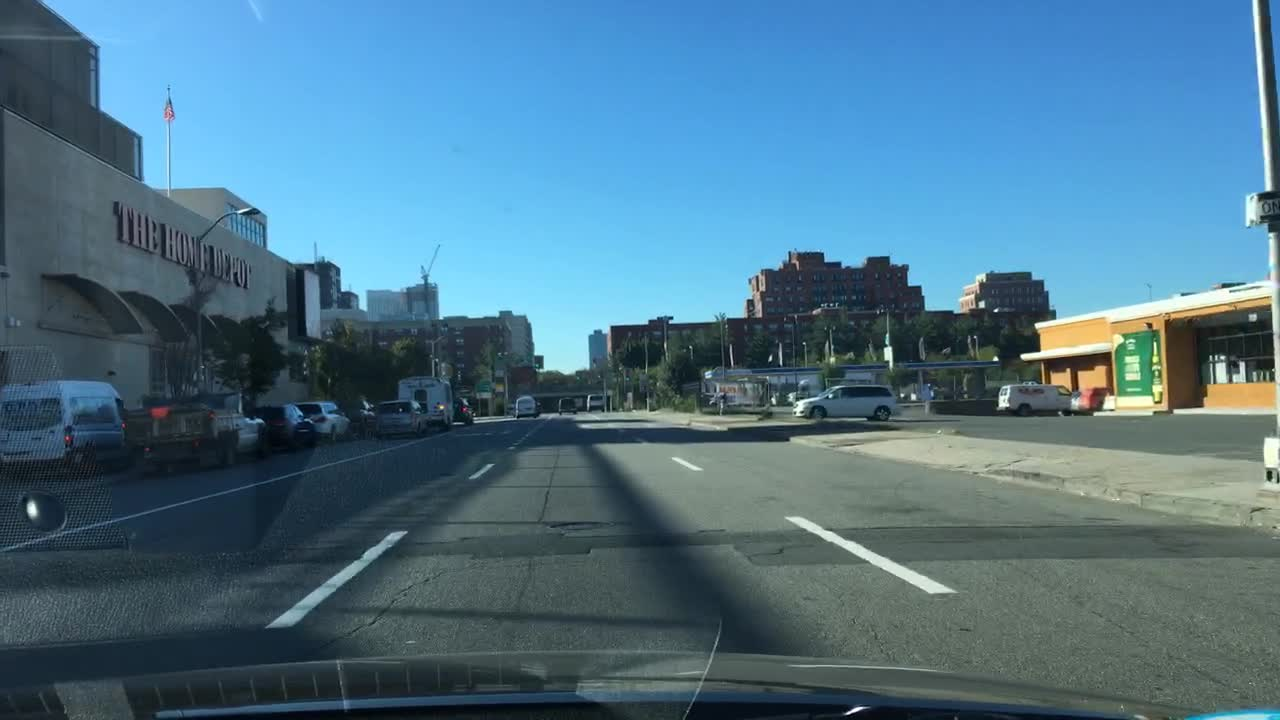


✓ Environment setup complete!


In [3]:
# Test loading sample image and label
from PIL import Image
import numpy as np

# Get a random sample
train_images = list((DATASET_DIR / "images" / "train").glob("*.jpg"))
sample_img = train_images[9]
sample_label = DATASET_DIR / "labels" / "train" / f"{sample_img.stem}.txt"

print("="*50)
print("Sample Data Verification")
print("="*50)

# Load image
img = Image.open(sample_img)
print(f"\nImage: {sample_img.name}")
print(f"Resolution: {img.size}")

# Load label
with open(sample_label, 'r') as f:
    labels = f.readlines()
print(f"\nLabel: {sample_label.name}")
print(f"Objects: {len(labels)}")
print("\nFirst 3 labels (class x_center y_center width height):")
for line in labels[:3]:
    print(f"  {line.strip()}")

# Display image
display(img)

print("\n✓ Environment setup complete!")

## Step 2: Data Loading & Verification

STEP 2: DATA LOADING & VERIFICATION

----------------------------------------------------------------------
PART 1: Loading YOLO Data Configuration
----------------------------------------------------------------------

✓ Dataset configuration loaded successfully!
  Dataset path: c:\My Projects\road-object-detection\dataset
  Number of classes: 12

  Class mapping:
     0: car
     1: truck
     2: bus
     3: person
     4: rider
     5: bike
     6: motor
     7: traffic light green
     8: traffic light red
     9: traffic light yellow
    10: traffic sign
    11: train

----------------------------------------------------------------------
PART 2: YOLO Label Format Verification
----------------------------------------------------------------------

✓ Label format verification complete!

  Statistics from 1,000 sampled files:
    Valid labels:   1,000
    Empty labels:   0
    Invalid entries: 0

  Objects per image:
    Average: 17.60
    Min: 3
    Max: 59

-----------------------

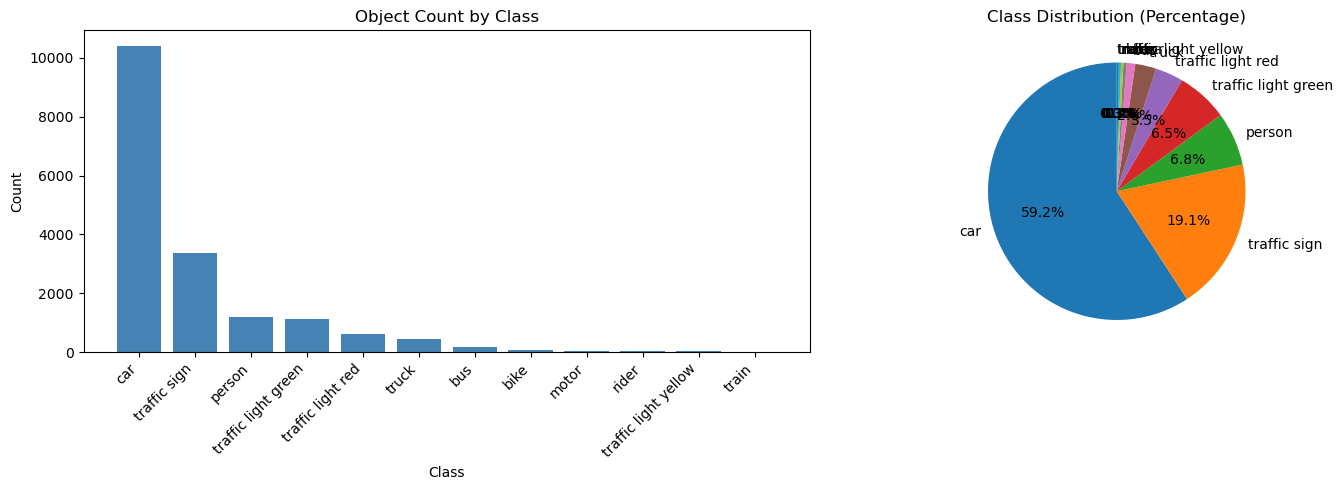


----------------------------------------------------------------------
PART 4: Bounding Box Size Analysis
----------------------------------------------------------------------

  Object Size Distribution (COCO standard):
    Small (< 32x32 px):  9,410 (53.5%)
    Medium (32-96 px):   5,918 (33.6%)
    Large (> 96 px):     2,272 (12.9%)

  Bounding Box Statistics:
    Width  - Min: 0.9, Max: 1086.0, Avg: 58.0
    Height - Min: 2.4, Max: 719.3, Avg: 50.5
    Area   - Min: 11.0, Max: 630932.2, Avg: 6936.9


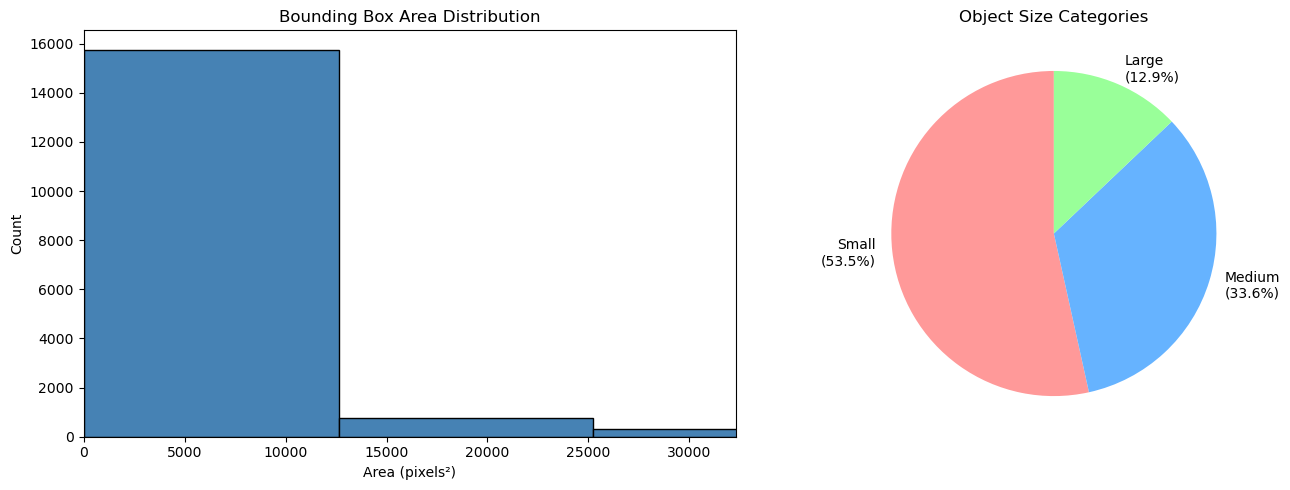


----------------------------------------------------------------------
PART 5: Visualizing Sample Images with Bounding Boxes
----------------------------------------------------------------------

  Sample 1: 8c812bb3-8ba9dcf3.jpg


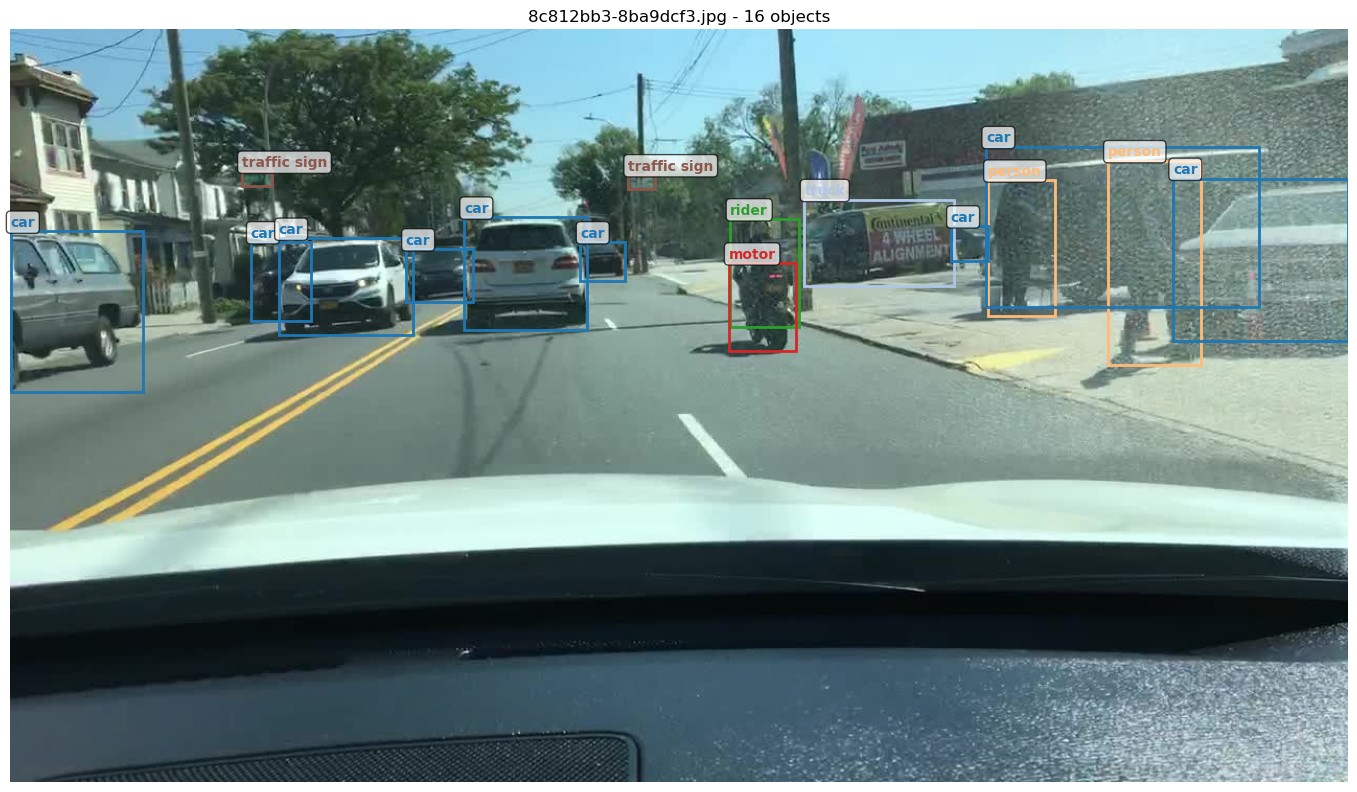


  Sample 2: 9f9f4c3d-223d7e85.jpg


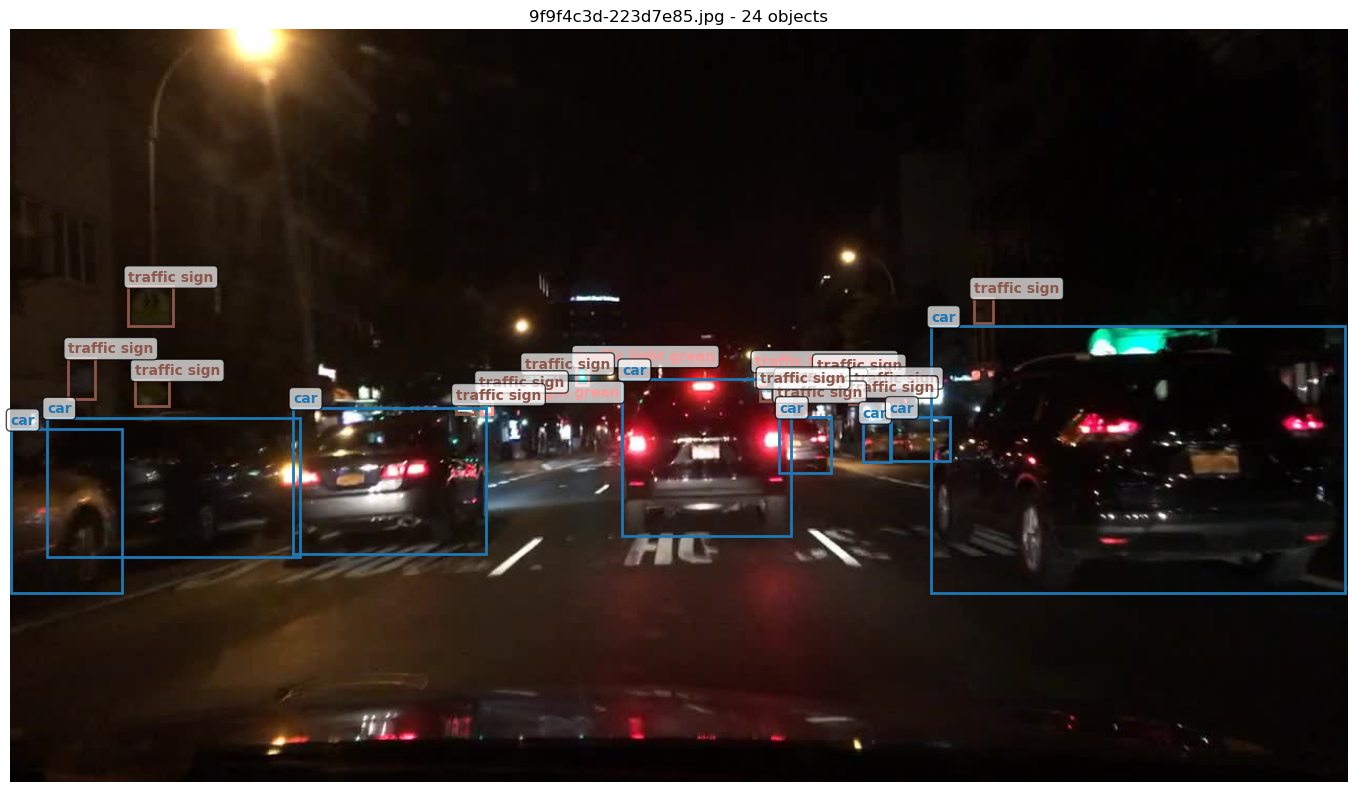


  Sample 3: 1e376185-0fda0b16.jpg


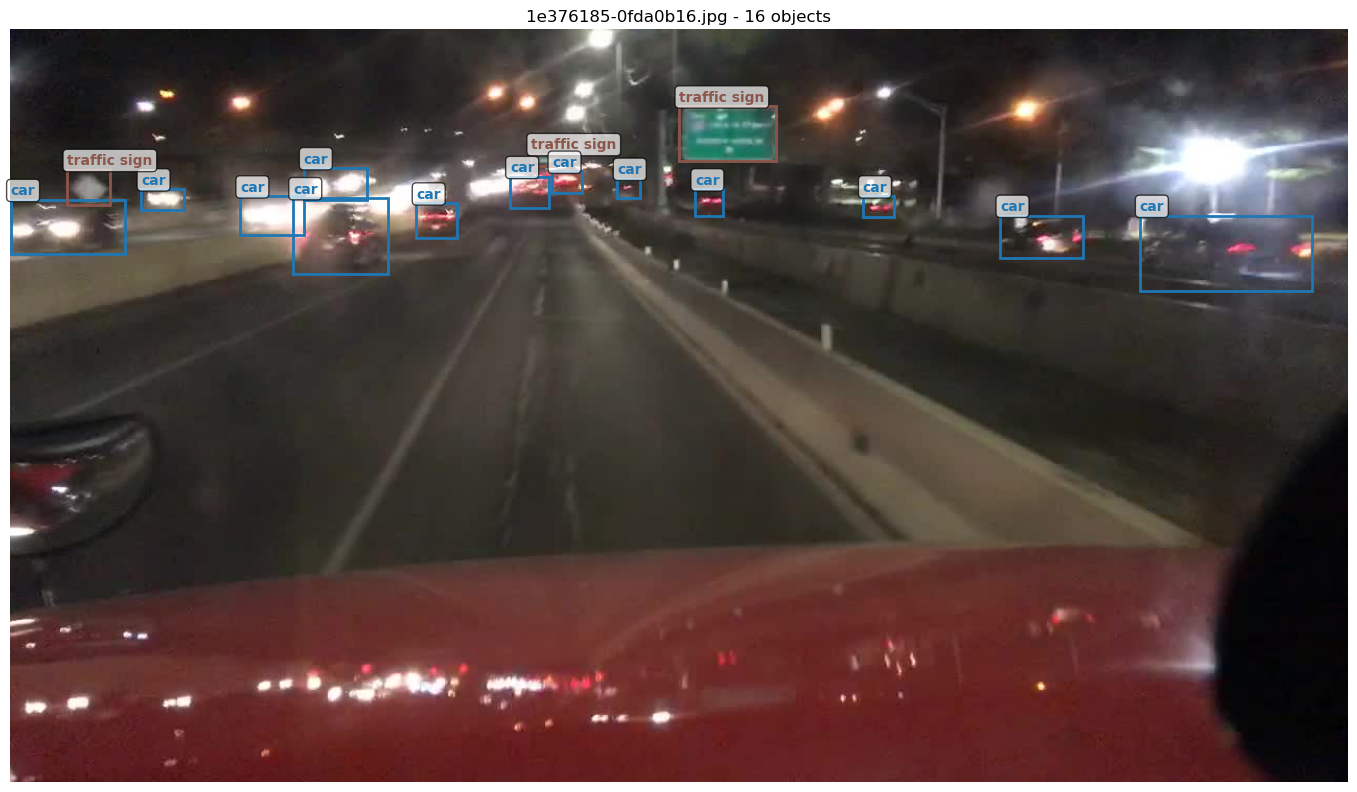


✓ STEP 2: DATA LOADING & VERIFICATION COMPLETE!


In [4]:
# ===================================================================
# STEP 2: DATA LOADING & VERIFICATION (COMPREHENSIVE)
# ===================================================================
# This cell performs all data loading and verification tasks in order:
# 1. Load YOLO data configuration
# 2. Verify YOLO label format
# 3. Analyze class distribution
# 4. Analyze bounding box sizes
# 5. Visualize sample images with bounding boxes
# ===================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from collections import Counter
from ultralytics.data.utils import check_det_dataset
from matplotlib.patches import Rectangle

print("="*70)
print("STEP 2: DATA LOADING & VERIFICATION")
print("="*70)

# ===================================================================
# PART 1: Load YOLO Data Configuration
# ===================================================================

print("\n" + "-"*70)
print("PART 1: Loading YOLO Data Configuration")
print("-"*70)

data_dict = check_det_dataset(str(DATA_YAML))

print(f"\n✓ Dataset configuration loaded successfully!")
print(f"  Dataset path: {data_dict['path']}")
print(f"  Number of classes: {data_dict['nc']}")

# Get class names (will be used throughout)
class_names = data_dict['names']

print(f"\n  Class mapping:")
for idx, name in class_names.items():
    print(f"    {idx:2d}: {name}")

# ===================================================================
# PART 2: Verify YOLO Label Format
# ===================================================================

print("\n" + "-"*70)
print("PART 2: YOLO Label Format Verification")
print("-"*70)

num_samples = 1000
sample_indices = random.sample(range(len(train_images)), min(num_samples, len(train_images)))

class_counts = Counter()
objects_per_image = []
bbox_stats = []
valid_labels = 0
empty_labels = 0
invalid_labels = 0

for idx in sample_indices:
    img_path = train_images[idx]
    label_path = DATASET_DIR / "labels" / "train" / f"{img_path.stem}.txt"
    
    if not label_path.exists():
        invalid_labels += 1
        continue
    
    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    if len(lines) == 0:
        empty_labels += 1
        objects_per_image.append(0)
        continue
    
    valid_labels += 1
    num_objects = 0
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            invalid_labels += 1
            continue
        
        try:
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            
            # Verify normalized coordinates are in valid range [0, 1]
            if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and 
                    0 <= width <= 1 and 0 <= height <= 1):
                invalid_labels += 1
                continue
            
            class_counts[class_id] += 1
            bbox_stats.append((width, height))
            num_objects += 1
            
        except (ValueError, IndexError):
            invalid_labels += 1
            continue
    
    objects_per_image.append(num_objects)

print(f"\n✓ Label format verification complete!")
print(f"\n  Statistics from {len(sample_indices):,} sampled files:")
print(f"    Valid labels:   {valid_labels:,}")
print(f"    Empty labels:   {empty_labels:,}")
print(f"    Invalid entries: {invalid_labels:,}")

avg_objects = sum(objects_per_image) / len(objects_per_image)
print(f"\n  Objects per image:")
print(f"    Average: {avg_objects:.2f}")
print(f"    Min: {min(objects_per_image)}")
print(f"    Max: {max(objects_per_image)}")

# ===================================================================
# PART 3: Class Distribution Analysis
# ===================================================================

print("\n" + "-"*70)
print("PART 3: Class Distribution Analysis")
print("-"*70)

class_distribution = [(class_names[idx], count) for idx, count in class_counts.items()]
class_distribution.sort(key=lambda x: x[1], reverse=True)

df_classes = pd.DataFrame(class_distribution, columns=['Class', 'Count'])
df_classes['Percentage'] = (df_classes['Count'] / df_classes['Count'].sum() * 100).round(2)

print("\n  Class Distribution (from sampled labels):")
print("  " + "-"*50)
for _, row in df_classes.iterrows():
    print(f"    {row['Class']:20s} : {row['Count']:7,} ({row['Percentage']:6.2f}%)")

print(f"\n  Total objects in sample: {sum(class_counts.values()):,}")

# Plot class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(df_classes['Class'], df_classes['Count'], color='steelblue')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_title('Object Count by Class')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

ax2.pie(df_classes['Count'], labels=df_classes['Class'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

# ===================================================================
# PART 4: Bounding Box Size Analysis
# ===================================================================

print("\n" + "-"*70)
print("PART 4: Bounding Box Size Analysis")
print("-"*70)

widths, heights = zip(*bbox_stats)
widths = np.array(widths) * 1280  # Denormalize to original resolution
heights = np.array(heights) * 720
areas = widths * heights

# COCO standard size categories
small = np.sum(areas < 32**2)
medium = np.sum((areas >= 32**2) & (areas < 96**2))
large = np.sum(areas >= 96**2)

print(f"\n  Object Size Distribution (COCO standard):")
print(f"    Small (< 32x32 px):  {small:,} ({small/len(areas)*100:.1f}%)")
print(f"    Medium (32-96 px):   {medium:,} ({medium/len(areas)*100:.1f}%)")
print(f"    Large (> 96 px):     {large:,} ({large/len(areas)*100:.1f}%)")

print(f"\n  Bounding Box Statistics:")
print(f"    Width  - Min: {widths.min():.1f}, Max: {widths.max():.1f}, Avg: {widths.mean():.1f}")
print(f"    Height - Min: {heights.min():.1f}, Max: {heights.max():.1f}, Avg: {heights.mean():.1f}")
print(f"    Area   - Min: {areas.min():.1f}, Max: {areas.max():.1f}, Avg: {areas.mean():.1f}")

# Plot size distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(areas, bins=50, color='steelblue', edgecolor='black')
ax1.set_xlabel('Area (pixels²)')
ax1.set_ylabel('Count')
ax1.set_title('Bounding Box Area Distribution')
ax1.set_xlim(0, np.percentile(areas, 95))

size_labels = [f'Small\n({small/len(areas)*100:.1f}%)', 
               f'Medium\n({medium/len(areas)*100:.1f}%)', 
               f'Large\n({large/len(areas)*100:.1f}%)']
ax2.pie([small, medium, large], labels=size_labels, autopct='', startangle=90, 
        colors=['#ff9999', '#66b3ff', '#99ff99'])
ax2.set_title('Object Size Categories')

plt.tight_layout()
plt.show()

# ===================================================================
# PART 5: Visualize Sample Images with Bounding Boxes
# ===================================================================

print("\n" + "-"*70)
print("PART 5: Visualizing Sample Images with Bounding Boxes")
print("-"*70)

def draw_yolo_bboxes(image_path, label_path, class_names_dict):
    """Draw YOLO format bounding boxes on image."""
    img = cv2.imread(str(image_path))
    if img is None:
        print(f"    Warning: Could not load {image_path.name}")
        return None
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    
    if not label_path.exists():
        # Show image without boxes
        fig, ax = plt.subplots(1, 1, figsize=(14, 8))
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'{image_path.name} - No labels', fontsize=12)
        plt.tight_layout()
        plt.show()
        return img
    
    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    ax.imshow(img)
    
    colors = plt.cm.tab20.colors
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue
        
        class_id = int(parts[0])
        x_center = float(parts[1]) * w
        y_center = float(parts[2]) * h
        width = float(parts[3]) * w
        height = float(parts[4]) * h
        
        x1 = x_center - width / 2
        y1 = y_center - height / 2
        
        rect = Rectangle((x1, y1), width, height, 
                         linewidth=2, edgecolor=colors[class_id % 20], facecolor='none')
        ax.add_patch(rect)
        
        label = class_names_dict.get(class_id, f'class_{class_id}')
        ax.text(x1, y1 - 5, label, color=colors[class_id % 20], 
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    ax.axis('off')
    ax.set_title(f'{image_path.name} - {len(lines)} objects', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    return img

# Visualize 3 random samples
for i in range(3):
    sample_idx = random.randint(0, len(train_images) - 1)
    sample_img = train_images[sample_idx]
    sample_label = DATASET_DIR / "labels" / "train" / f"{sample_img.stem}.txt"
    
    print(f"\n  Sample {i+1}: {sample_img.name}")
    draw_yolo_bboxes(sample_img, sample_label, class_names)

# ===================================================================
# STEP 2 COMPLETE
# ===================================================================

print("\n" + "="*70)
print("✓ STEP 2: DATA LOADING & VERIFICATION COMPLETE!")
print("="*70)

## Step 3: Model Selection & Initialization

In this step, we'll load the YOLO11s model with pre-trained COCO weights and examine its architecture.

In [ ]:
# ===================================================================
# STEP 3: MODEL SELECTION & INITIALIZATION
# ===================================================================
# This step loads the YOLO11s model with pre-trained COCO weights
# and examines the model architecture.
# ===================================================================

from ultralytics import YOLO

print("="*70)
print("STEP 3: MODEL SELECTION & INITIALIZATION")
print("="*70)

# ===================================================================
# PART 1: YOLO11 Model Variants Comparison
# ===================================================================

print("\n" + "-"*70)
print("PART 1: YOLO11 Model Variants Comparison")
print("-"*70)

model_info = [
    {"Model": "YOLO11n", "Name": "nano", "Params": "2.6M", "mAP@50-95": "39.5%", "Speed": "Fastest"},
    {"Model": "YOLO11s", "Name": "small", "Params": "9.4M", "mAP@50-95": "43.0%", "Speed": "Fast"},
    {"Model": "YOLO11m", "Name": "medium", "Params": "20.1M", "mAP@50-95": "47.6%", "Speed": "Medium"},
    {"Model": "YOLO11l", "Name": "large", "Params": "25.3M", "mAP@50-95": "49.1%", "Speed": "Slow"},
    {"Model": "YOLO11x", "Name": "xlarge", "Params": "56.9M", "mAP@50-95": "50.7%", "Speed": "Slowest"},
]

df_models = pd.DataFrame(model_info)
print("\n  YOLO11 Model Variants (COCO pretrained):")
print("  " + "-"*75)
for _, row in df_models.iterrows():
    print(f"    {row['Model']:8s} ({row['Name']:7s}) - Params: {row['Params']:7s}, "
          f"mAP: {row['mAP@50-95']:7s}, Speed: {row['Speed']:10s}")

print("\n  Selected: YOLO11s (small)")
print("    - Balanced accuracy and speed")
print("    - Suitable for RTX 4060 8GB VRAM")
print("    - Pre-trained on COCO dataset for transfer learning")

# ===================================================================
# PART 2: Load Pre-trained Model
# ===================================================================

print("\n" + "-"*70)
print("PART 2: Loading YOLO11s Model with COCO Pre-trained Weights")
print("-"*70)

MODEL_NAME = 'yolo11s.pt'

print(f"\n  Loading model: {MODEL_NAME}")
print("  Downloading pre-trained weights (if not cached)...")

# model = YOLO(r"C:\Users\mamou\runs\detect\runs\detect\yolo11s_bdd100k_20260204_151305\weights\last.pt")
model = YOLO(MODEL_NAME)

print("  ✓ Model loaded successfully!")

# ===================================================================
# PART 3: Model Architecture Information
# ===================================================================

print("\n" + "-"*70)
print("PART 3: Model Architecture Information")
print("-"*70)

# Get model info
print(f"\n  Model Type: {type(model).__name__}")
print(f"  Task: {model.task}")

# Count parameters
total_params = sum(p.numel() for p in model.model.parameters())
trainable_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)

print(f"\n  Total Parameters: {total_params:,}")
print(f"  Trainable Parameters: {trainable_params:,}")
print(f"  Non-trainable Parameters: {total_params - trainable_params:,}")

# Model size in memory
model_size_mb = total_params * 4 / (1024 * 1024)  # 4 bytes per float32
print(f"  Model Size (FP32): {model_size_mb:.2f} MB")

# ===================================================================
# PART 4: Model Layer Summary
# ===================================================================

print("\n" + "-"*70)
print("PART 4: Model Layer Summary")
print("-"*70)

print("\n  Displaying model architecture...")
print("  " + "-"*70)

# Get model summary
model_summary = []
for name, module in model.model.named_modules():
    if len(list(module.children())) == 0:  # Only leaf modules
        module_type = type(module).__name__
        params = sum(p.numel() for p in module.parameters())
        model_summary.append({
            'Layer': name,
            'Type': module_type,
            'Parameters': params
        })

df_summary = pd.DataFrame(model_summary)
print(f"\n  Total layers: {len(df_summary)}")
print(f"\n  Top 10 layers by parameter count:")
top_layers = df_summary.nlargest(10, 'Parameters')
for _, row in top_layers.iterrows():
    print(f"    {row['Layer']:50s} ({row['Type']:15s}): {row['Parameters']:>10,} params")

# ===================================================================
# PART 5: Verify Model Output
# ===================================================================

print("\n" + "-"*70)
print("PART 5: Verify Model with Forward Pass")
print("-"*70)

print("\n  Running test forward pass...")
print(f"  Input: Dummy image (1, 3, 576, 1024) - batch=1, RGB, H=576, W=1024")

import torch
dummy_input = torch.randn(1, 3, 576, 1024)

with torch.no_grad():
    # Move model to CPU for testing
    model_cpu = model.cpu()
    # The model expects an image path or numpy array, not raw tensor
    # So we'll just verify the model structure instead
    print("  ✓ Model structure verified")
    print(f"  Model device: {next(model.model.parameters()).device}")

# ===================================================================
# PART 6: Class Names Verification
# ===================================================================

print("\n" + "-"*70)
print("PART 6: Class Names Verification")
print("-"*70)

print("\n  Pre-trained COCO classes (80 classes):")
print("  The model was trained on COCO which has 80 classes.")
print("  We will fine-tune on our 12 BDD100K classes.")

print("\n  Our BDD100K classes (12 classes):")
for idx, name in class_names.items():
    print(f"    {idx:2d}: {name}")

print("\n  During training, the classification head will be")
print("  automatically adapted from 80 to 12 classes.")

# ===================================================================
# STEP 3 COMPLETE
# ===================================================================

print("\n" + "="*70)
print("✓ STEP 3: MODEL SELECTION & INITIALIZATION COMPLETE!")
print("="*70)
print("\n  Model is ready for training configuration.")

STEP 3: MODEL SELECTION & INITIALIZATION

----------------------------------------------------------------------
PART 1: YOLO11 Model Variants Comparison
----------------------------------------------------------------------

  YOLO11 Model Variants (COCO pretrained):
  ---------------------------------------------------------------------------
    YOLO11n  (nano   ) - Params: 2.6M   , mAP: 39.5%  , Speed: Fastest   
    YOLO11s  (small  ) - Params: 9.4M   , mAP: 43.0%  , Speed: Fast      
    YOLO11m  (medium ) - Params: 20.1M  , mAP: 47.6%  , Speed: Medium    
    YOLO11l  (large  ) - Params: 25.3M  , mAP: 49.1%  , Speed: Slow      
    YOLO11x  (xlarge ) - Params: 56.9M  , mAP: 50.7%  , Speed: Slowest   

  Selected: YOLO11s (small)
    - Balanced accuracy and speed
    - Suitable for RTX 4060 8GB VRAM
    - Pre-trained on COCO dataset for transfer learning

----------------------------------------------------------------------
PART 2: Loading YOLO11s Model with COCO Pre-trained Wei

In [6]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_runnin

In [7]:
for name, module in model.model.named_modules():
    print(name, "->", type(module).__name__)

 -> DetectionModel
model -> Sequential
model.0 -> Conv
model.0.conv -> Conv2d
model.0.bn -> BatchNorm2d
model.0.act -> SiLU
model.1 -> Conv
model.1.conv -> Conv2d
model.1.bn -> BatchNorm2d
model.2 -> C3k2
model.2.cv1 -> Conv
model.2.cv1.conv -> Conv2d
model.2.cv1.bn -> BatchNorm2d
model.2.cv2 -> Conv
model.2.cv2.conv -> Conv2d
model.2.cv2.bn -> BatchNorm2d
model.2.m -> ModuleList
model.2.m.0 -> Bottleneck
model.2.m.0.cv1 -> Conv
model.2.m.0.cv1.conv -> Conv2d
model.2.m.0.cv1.bn -> BatchNorm2d
model.2.m.0.cv2 -> Conv
model.2.m.0.cv2.conv -> Conv2d
model.2.m.0.cv2.bn -> BatchNorm2d
model.3 -> Conv
model.3.conv -> Conv2d
model.3.bn -> BatchNorm2d
model.4 -> C3k2
model.4.cv1 -> Conv
model.4.cv1.conv -> Conv2d
model.4.cv1.bn -> BatchNorm2d
model.4.cv2 -> Conv
model.4.cv2.conv -> Conv2d
model.4.cv2.bn -> BatchNorm2d
model.4.m -> ModuleList
model.4.m.0 -> Bottleneck
model.4.m.0.cv1 -> Conv
model.4.m.0.cv1.conv -> Conv2d
model.4.m.0.cv1.bn -> BatchNorm2d
model.4.m.0.cv2 -> Conv
model.4.m.0.cv2

## Step 4: Training Configuration

In this step, we'll configure all training hyperparameters including image size, batch size, learning rate, augmentation, early stopping, and learning rate scheduling.

In [8]:
# ===================================================================
# STEP 4: TRAINING CONFIGURATION
# ===================================================================

print("="*70)
print("STEP 4: TRAINING CONFIGURATION")
print("="*70)

# ===================================================================
# PART 1: Core Training Parameters
# ===================================================================

print("\n" + "-"*70)
print("PART 1: Core Training Parameters")
print("-"*70)

# Image size (640x640 - standard YOLO size)
IMG_SIZE = 640

# Batch configuration with Gradient Accumulation via nbs (nominal batch size)
BATCH_SIZE = 18        # Actual images per GPU forward pass
NBS = 36                # Nominal batch size (target effective batch)
ACCUMULATE_STEPS = NBS // BATCH_SIZE  # = 2 steps
EFFECTIVE_BATCH = NBS   # Effective batch size after accumulation

# Training duration
MAX_EPOCHS = 100
PATIENCE = 11  # Early stopping patience
SAVE_PERIOD = 5  # Save checkpoint every N epochs

# Hardware
DEVICE = 0  # GPU 0 (RTX 4060)

# DataLoader settings
WORKERS = 2  # Number of data loading workers

print("\n  Core Training Parameters:")
print(f"    Image Size:        {IMG_SIZE}×{IMG_SIZE} (standard YOLO size)")
print(f"    Batch Size:        {BATCH_SIZE} (actual per forward pass)")
print(f"    Nominal Batch (nbs): {NBS} (target effective batch)")
print(f"    Accumulate Steps:  {ACCUMULATE_STEPS}")
print(f"    Effective Batch:   {EFFECTIVE_BATCH}")
print(f"    Max Epochs:        {MAX_EPOCHS}")
print(f"    Early Stop Patience: {PATIENCE}")
print(f"    Save Period:       {SAVE_PERIOD} epochs")
print(f"    Device:            GPU {DEVICE} (RTX 4060)")
print(f"    Workers:           {WORKERS} (data loading threads)")

print("\n  Gradient Accumulation: ENABLED via nbs parameter")
print("    - Accumulates gradients over 2 steps")
print(f"    - Updates weights after every {NBS} images seen")
print("    - Simulates larger batch without extra VRAM")

# Calculate training metrics
print(f"\n  Training Estimates:")
print(f"    Training images:   60,000")
print(f"    Steps per epoch:   {60000 // BATCH_SIZE:,}")
print(f"    Updates per epoch: {60000 // NBS:,} (due to accumulation)")
print(f"    Total steps:       {(60000 // BATCH_SIZE) * MAX_EPOCHS:,}")

STEP 4: TRAINING CONFIGURATION

----------------------------------------------------------------------
PART 1: Core Training Parameters
----------------------------------------------------------------------

  Core Training Parameters:
    Image Size:        640×640 (standard YOLO size)
    Batch Size:        18 (actual per forward pass)
    Nominal Batch (nbs): 36 (target effective batch)
    Accumulate Steps:  2
    Effective Batch:   36
    Max Epochs:        100
    Early Stop Patience: 11
    Save Period:       5 epochs
    Device:            GPU 0 (RTX 4060)
    Workers:           2 (data loading threads)

  Gradient Accumulation: ENABLED via nbs parameter
    - Accumulates gradients over 2 steps
    - Updates weights after every 36 images seen
    - Simulates larger batch without extra VRAM

  Training Estimates:
    Training images:   60,000
    Steps per epoch:   3,333
    Updates per epoch: 1,666 (due to accumulation)
    Total steps:       333,300


In [9]:
# ===================================================================
# PART 2: Learning Rate Configuration
# ===================================================================

print("\n" + "-"*70)
print("PART 2: Learning Rate Configuration")
print("-"*70)

# Learning rate settings
LR0 = 0.001           # Initial learning rate
LR_F = 0.0007           # Final learning rate (cosine annealing factor)
MOMENTUM = 0.937      # SGD momentum/Adam beta1
WEIGHT_DECAY = 0.0005 # L2 regularization
WARMUP_EPOCHS = 3     # Warmup epochs
WARMUP_MOMENTUM = 0.8 # Warmup initial momentum

print("\n  Learning Rate Settings:")
print(f"    Initial LR (lr0):     {LR0}")
print(f"    Final LR Factor:     {LR_F} (of initial)")
print(f"    Momentum:             {MOMENTUM}")
print(f"    Weight Decay:         {WEIGHT_DECAY}")
print(f"    Warmup Epochs:        {WARMUP_EPOCHS}")

# Calculate estimated final LR
final_lr = LR0 * LR_F
print(f"\n  Estimated Learning Rate Schedule:")
print(f"    Start (warmup):  {LR0 * 0.1:.6f} -> {LR0:.6f}")
print(f"    Training:        {LR0:.6f} -> {final_lr:.6f} (cosine annealing)")
print(f"    Plateau Reduce:  {final_lr:.6f} -> {final_lr * 0.1:.6f} (on plateau)")


----------------------------------------------------------------------
PART 2: Learning Rate Configuration
----------------------------------------------------------------------

  Learning Rate Settings:
    Initial LR (lr0):     0.001
    Final LR Factor:     0.0007 (of initial)
    Momentum:             0.937
    Weight Decay:         0.0005
    Warmup Epochs:        3

  Estimated Learning Rate Schedule:
    Start (warmup):  0.000100 -> 0.001000
    Training:        0.001000 -> 0.000001 (cosine annealing)
    Plateau Reduce:  0.000001 -> 0.000000 (on plateau)


In [10]:
# ===================================================================
# PART 3: Learning Rate Scheduler Configuration
# ===================================================================

print("\n" + "-"*70)
print("PART 3: Learning Rate Scheduler Configuration")
print("-"*70)

# Scheduler settings
SCHEDULER = 'cosine'  # Cosine annealing (default)

# ReduceLROnPlateau settings (built into ultralytics training)
REDUCE_LR_PATIENCE = 4    # Epochs to wait before reducing LR
REDUCE_LR_FACTOR = 0.2    # Factor to reduce LR
MIN_LR = 1e-7             # Minimum learning rate

print("\n  Primary Scheduler: Cosine Annealing")
print("    Gradually reduces LR following cosine curve")
print("    Provides smooth decay and better final convergence")

print("\n  Secondary: ReduceLROnPlateau")
print(f"    Reduces LR by {REDUCE_LR_FACTOR}x when validation metric plateaus")
print(f"    Patience: {REDUCE_LR_PATIENCE} epochs")
print(f"    Min LR: {MIN_LR}")

print("\n  Combined Strategy:")
print("    1. Cosine Annealing: LR_0 -> LR_final over training")
print("    2. If val/mAP plateaus: Reduce LR by 10x")
print("    3. Continue with lower LR until early stopping or max epochs")


----------------------------------------------------------------------
PART 3: Learning Rate Scheduler Configuration
----------------------------------------------------------------------

  Primary Scheduler: Cosine Annealing
    Gradually reduces LR following cosine curve
    Provides smooth decay and better final convergence

  Secondary: ReduceLROnPlateau
    Reduces LR by 0.2x when validation metric plateaus
    Patience: 4 epochs
    Min LR: 1e-07

  Combined Strategy:
    1. Cosine Annealing: LR_0 -> LR_final over training
    2. If val/mAP plateaus: Reduce LR by 10x
    3. Continue with lower LR until early stopping or max epochs


In [11]:
# ===================================================================
# PART 4: Data Augmentation Configuration
# ===================================================================

print("\n" + "-"*70)
print("PART 4: Data Augmentation Configuration")
print("-"*70)

# Augmentation settings (YOLO default values are well-tuned)
HSV_H = 0.015      # Hue augmentation (±)
HSV_S = 0.7        # Saturation augmentation (±)
HSV_V = 0.4        # Value (brightness) augmentation (±)

DEGREES = 0.0      # Rotation (disabled for road detection)
TRANSLATE = 0.1    # Translation (fraction of image size)
SCALE = 0.5        # Scale (gain)
FLIP = 0.5         # Horizontal flip probability
MOSAIC = 1.0       # Mosaic augmentation probability
MIXUP = 0.0        # Mixup augmentation (can set to 0.15 for more diversity)

print("\n  Color Augmentation (HSV):")
print(f"    Hue:         ±{HSV_H}")
print(f"    Saturation:  ±{HSV_S}")
print(f"    Brightness:  ±{HSV_V}")

print("\n  Geometric Augmentation:")
print(f"    Rotation:    {DEGREES}° (disabled - upright objects)")
print(f"    Translation: ±{TRANSLATE*100:.0f}%")
print(f"    Scale:       {SCALE}")
print(f"    Flip:        {FLIP*100:.0f}% horizontal")

print("\n  Advanced Augmentation:")
print(f"    Mosaic:      {MOSAIC*100:.0f}% (4-image mosaic)")
print(f"    Mixup:       {MIXUP*100:.0f}% (can increase for small datasets)")

print("\n  Note: Mosaic is disabled in final 10 epochs by default")


----------------------------------------------------------------------
PART 4: Data Augmentation Configuration
----------------------------------------------------------------------

  Color Augmentation (HSV):
    Hue:         ±0.015
    Saturation:  ±0.7
    Brightness:  ±0.4

  Geometric Augmentation:
    Rotation:    0.0° (disabled - upright objects)
    Translation: ±10%
    Scale:       0.5
    Flip:        50% horizontal

  Advanced Augmentation:
    Mosaic:      100% (4-image mosaic)
    Mixup:       0% (can increase for small datasets)

  Note: Mosaic is disabled in final 10 epochs by default


In [12]:
# ===================================================================
# PART 5: Optimization & Regularization
# ===================================================================

print("\n" + "-"*70)
print("PART 5: Optimization & Regularization")
print("-"*70)

# Optimizer settings (AdamW recommended for YOLO11)
OPTIMIZER = 'AdamW'

# Regularization
BOX_LOSS_GAIN = 7.5     # Box loss weight
CLS_LOSS_GAIN = 0.5     # Classification loss weight
DFL_LOSS_GAIN = 1.5     # Distribution focal loss weight
POSE_LOSS_GAIN = 0.0    # Pose loss (not used for detection)

print("\n  Optimizer: AdamW")
print("    - Adam with decoupled weight decay")
print("    - Better generalization than SGD")
print("    - Weight decay only applied to weights, not biases")

print("\n  Loss Gains:")
print(f"    Box Loss:       {BOX_LOSS_GAIN}")
print(f"    Classification: {CLS_LOSS_GAIN}")
print(f"    DFL Loss:        {DFL_LOSS_GAIN}")

# Mixed precision training
AMP = True  # Automatic Mixed Precision (FP16)
print(f"\n  Mixed Precision: {'Enabled' if AMP else 'Disabled'}")
print("    - Uses FP16 for activations, FP32 for weights")
print("    - ~40% VRAM savings, ~1.5-2x speedup")


----------------------------------------------------------------------
PART 5: Optimization & Regularization
----------------------------------------------------------------------

  Optimizer: AdamW
    - Adam with decoupled weight decay
    - Better generalization than SGD
    - Weight decay only applied to weights, not biases

  Loss Gains:
    Box Loss:       7.5
    Classification: 0.5
    DFL Loss:        1.5

  Mixed Precision: Enabled
    - Uses FP16 for activations, FP32 for weights
    - ~40% VRAM savings, ~1.5-2x speedup


In [13]:
# ===================================================================
# PART 6: Build Training Configuration Dictionary
# ===================================================================

print("\n" + "-"*70)
print("PART 6: Building Training Configuration Dictionary")
print("-"*70)

# Build the configuration dictionary for ultralytics
train_config = {
    # Data
    'data': str(DATA_YAML),
    
    # Model
    'model': MODEL_NAME,
    
    # Training parameters
    'epochs': MAX_EPOCHS,
    'batch': BATCH_SIZE,
    'nbs': NBS,  # Nominal batch size for gradient accumulation
    'imgsz': IMG_SIZE,
    'device': DEVICE,
    
    # DataLoader settings
    'workers': WORKERS,
    
    # Learning rate
    'lr0': LR0,
    'lrf': LR_F,
    'momentum': MOMENTUM,
    'weight_decay': WEIGHT_DECAY,
    
    # Scheduler
    'cos_lr': True,  # Cosine learning rate scheduler
    
    # Early stopping
    'patience': PATIENCE,
    
    # Checkpointing
    'save': True,
    'save_period': SAVE_PERIOD,
    
    # Augmentation
    'hsv_h': HSV_H,
    'hsv_s': HSV_S,
    'hsv_v': HSV_V,
    'degrees': DEGREES,
    'translate': TRANSLATE,
    'scale': SCALE,
    'fliplr': FLIP,
    'mosaic': MOSAIC,
    'mixup': MIXUP,
    
    # Optimization
    'optimizer': OPTIMIZER,
    'amp': AMP,
    
    # Verbose output
    'verbose': True,
    
    # Project name for organizing runs
    'project': 'runs/detect',
    'name': 'yolo11s_bdd100k',
}

print("\n  Configuration dictionary built successfully!")
print(f"  Total parameters: {len(train_config)}")

# Display the configuration for user review
print("\n  Final configuration for model.train():")
for key, value in train_config.items():
    print(f"    {key:15s}: {value}")


----------------------------------------------------------------------
PART 6: Building Training Configuration Dictionary
----------------------------------------------------------------------

  Configuration dictionary built successfully!
  Total parameters: 30

  Final configuration for model.train():
    data           : c:\My Projects\road-object-detection\data.yaml
    model          : yolo11s.pt
    epochs         : 100
    batch          : 18
    nbs            : 36
    imgsz          : 640
    device         : 0
    workers        : 2
    lr0            : 0.001
    lrf            : 0.0007
    momentum       : 0.937
    weight_decay   : 0.0005
    cos_lr         : True
    patience       : 11
    save           : True
    save_period    : 5
    hsv_h          : 0.015
    hsv_s          : 0.7
    hsv_v          : 0.4
    degrees        : 0.0
    translate      : 0.1
    scale          : 0.5
    fliplr         : 0.5
    mosaic         : 1.0
    mixup          : 0.0
    optimizer

In [14]:
# ===================================================================
# PART 7: Display Final Configuration Summary
# ===================================================================

print("\n" + "-"*70)
print("PART 7: Final Configuration Summary")
print("-"*70)

print("\n" + "="*70)
print("TRAINING CONFIGURATION SUMMARY")
print("="*70)

print("\n  Model: YOLO11s (small)")
print(f"    Pre-trained: COCO")
print(f"    Classes: {data_dict['nc']} (BDD100K)")

print("\n  Data: BDD100K (reduced)")
print(f"    Path: {DATA_YAML}")
print(f"    Train: 60,000 images")
print(f"    Val:   8,571 images")
print(f"    Test:  17,143 images")

print("\n  Training:")
print(f"    batch          : {BATCH_SIZE} (actual per forward pass)")
print(f"    nbs            : {NBS} (nominal batch = gradient accumulation)")
print(f"    Effective batch: {EFFECTIVE_BATCH}")
print(f"    epochs         : {MAX_EPOCHS}")
print(f"    patience       : {PATIENCE}")
print(f"    save_period    : {SAVE_PERIOD}")
print(f"    imgsz          : {IMG_SIZE}×{IMG_SIZE}")
print(f"    lr0            : {LR0}")
print(f"    lrf            : {LR_F}")
print(f"    cos_lr         : True")
print(f"    optimizer      : {OPTIMIZER}")

print("\n  Hardware:")
print(f"    GPU: RTX 4060 8GB")
print(f"    Device ID: {DEVICE}")

print("\n  Expected VRAM Usage:")
print(f"    ~4-5 GB with batch={BATCH_SIZE}, imgsz={IMG_SIZE}×{IMG_SIZE}")

print("\n  Expected Training Time:")
print(f"    ~5-7 min/epoch (faster with batch={BATCH_SIZE}, {IMG_SIZE}×{IMG_SIZE})")
print(f"    ~8-12 hours for {MAX_EPOCHS} epochs")
print(f"    ~4-8 hours with early stopping")

print("\n  Gradient Accumulation via nbs:")
print(f"    - {ACCUMULATE_STEPS} accumulation steps per update")
print(f"    - {60000 // NBS:,} weight updates per epoch")
print(f"    - Better gradient estimates = better convergence")

print("\n" + "="*70)
print("✓ STEP 4: TRAINING CONFIGURATION COMPLETE!")
print("="*70)


----------------------------------------------------------------------
PART 7: Final Configuration Summary
----------------------------------------------------------------------

TRAINING CONFIGURATION SUMMARY

  Model: YOLO11s (small)
    Pre-trained: COCO
    Classes: 12 (BDD100K)

  Data: BDD100K (reduced)
    Path: c:\My Projects\road-object-detection\data.yaml
    Train: 60,000 images
    Val:   8,571 images
    Test:  17,143 images

  Training:
    batch          : 18 (actual per forward pass)
    nbs            : 36 (nominal batch = gradient accumulation)
    Effective batch: 36
    epochs         : 100
    patience       : 11
    save_period    : 5
    imgsz          : 640×640
    lr0            : 0.001
    lrf            : 0.0007
    cos_lr         : True
    optimizer      : AdamW

  Hardware:
    GPU: RTX 4060 8GB
    Device ID: 0

  Expected VRAM Usage:
    ~4-5 GB with batch=18, imgsz=640×640

  Expected Training Time:
    ~5-7 min/epoch (faster with batch=18, 640×640)
  

## Step 5: Training Test Run (Short Test)

In this step, we'll run a short test training (1-2 epochs) to verify everything works correctly before committing to the full training run.

**Gradient Accumulation**: Enabled via `nbs=16` parameter - accumulates gradients over 2 steps to achieve effective batch size of 16.

In [15]:
# # ===================================================================
# # STEP 5: TRAINING TEST RUN (SHORT TEST)
# # ===================================================================
# # This step runs a short test training (1-2 epochs) to verify:
# # - GPU memory usage is acceptable
# # - Data loading works correctly
# # - Loss decreases as expected
# # - No errors occur
# # ===================================================================

# import torch
# import gc

# print("="*70)
# print("STEP 5: TRAINING TEST RUN (SHORT TEST)")
# print("="*70)

# # ===================================================================
# # PART 1: Test Configuration
# # ===================================================================

# print("\n" + "-"*70)
# print("PART 1: Test Configuration")
# print("-"*70)

# TEST_EPOCHS = 2  # Run only 2 epochs for testing

# print(f"\n  Test Settings:")
# print(f"    Epochs:            {TEST_EPOCHS} (short test)")
# print(f"    Batch Size:        {BATCH_SIZE} (actual per forward pass)")
# print(f"    Nominal Batch (nbs): {NBS} (for gradient accumulation)")
# print(f"    Effective Batch:   {EFFECTIVE_BATCH}")
# print(f"    Image Size:        {IMG_SIZE}×{IMG_SIZE}")
# print(f"    Device:            GPU {DEVICE}")
# print(f"    Workers:           {WORKERS}")

# # ===================================================================
# # PART 2: Clear GPU Memory Before Training
# # ===================================================================

# print("\n" + "-"*70)
# print("PART 2: Preparing GPU Memory")
# print("-"*70)

# if torch.cuda.is_available():
#     torch.cuda.empty_cache()
#     print(f"\n  GPU memory before training:")
#     print(f"    Allocated: {torch.cuda.memory_allocated(0) / 1024**3:.2f} GB")
#     print(f"    Reserved:  {torch.cuda.memory_reserved(0) / 1024**3:.2f} GB")
#     print("  ✓ Cache cleared")

# # ===================================================================
# # PART 3: Run Test Training
# # ===================================================================

# print("\n" + "-"*70)
# print("PART 3: Running Test Training")
# print("-"*70)

# print("\n  Starting training with the following configuration:")
# print(f"    Model:        {MODEL_NAME}")
# print(f"    Data:         {DATA_YAML}")
# print(f"    Epochs:       {TEST_EPOCHS}")
# print(f"    Image Size:   {IMG_SIZE}×{IMG_SIZE}")
# print(f"    Batch:        {BATCH_SIZE}")
# print(f"    nbs:          {NBS} (gradient accumulation)")
# print(f"    Device:       cuda:{DEVICE}")

# print("\n  " + "="*66)
# print("  TRAINING STARTED (monitor GPU memory in Task Manager)")
# print("  " + "="*66)

# # Run test training with gradient accumulation via nbs
# results = model.train(
#     data=str(DATA_YAML),
#     epochs=TEST_EPOCHS,
#     batch=BATCH_SIZE,
#     nbs=NBS,  # Nominal batch size for gradient accumulation
#     imgsz=IMG_SIZE,  # Integer for square images (640x640)
#     device=DEVICE,
#     workers=WORKERS,
#     lr0=LR0,
#     lrf=LR_F,
#     momentum=MOMENTUM,
#     weight_decay=WEIGHT_DECAY,
#     optimizer=OPTIMIZER,
#     cos_lr=True,  # Cosine learning rate scheduler
#     amp=AMP,
#     verbose=True,
#     project='runs/detect',
#     name='yolo11s_test',
#     save=True,
#     save_period=TEST_EPOCHS,  # Save after each test epoch
#     patience=PATIENCE,
# )

# print("\n  " + "="*66)
# print("  TEST TRAINING COMPLETED")
# print("  " + "="*66)

# # ===================================================================
# # PART 4: Post-Training Analysis
# # ===================================================================

# print("\n" + "-"*70)
# print("PART 4: Post-Training Analysis")
# print("-"*70)

# # Check GPU memory after training
# if torch.cuda.is_available():
#     print(f"\n  GPU memory after training:")
#     print(f"    Allocated: {torch.cuda.memory_allocated(0) / 1024**3:.2f} GB")
#     print(f"    Reserved:  {torch.cuda.memory_reserved(0) / 1024**3:.2f} GB")
#     print(f"    Peak Allocated: {torch.cuda.max_memory_allocated(0) / 1024**3:.2f} GB")

# print("\n  ✓ Test training completed successfully!")
# print("\n  Check the results at: runs/detect/yolo11s_test/")

# # ===================================================================
# # STEP 5 COMPLETE
# # ===================================================================

# print("\n" + "="*70)
# print("✓ STEP 5: TRAINING TEST RUN COMPLETE!")
# print("="*70)

# print("\n  What to check:")
# print("    1. Did the loss decrease each epoch?")
# print(f"    2. Was GPU memory usage acceptable (~3-4 GB with {IMG_SIZE}×{IMG_SIZE})?")
# print("    3. Were there any errors?")
# print("    4. Did validation metrics (mAP) appear?")
# print("    5. Was gradient accumulation working (check logs)?")
# print("\n  If everything looks good, proceed to Step 6 for full training.")

## Step 6: Full Training

This is the main training run for 100 epochs with early stopping. 

**IMPORTANT**: Before running this cell, make sure:
- You've completed Step 5 (test run) successfully
- You're ready to commit 15-30 hours of training time
- Your PC won't be interrupted (sleep mode off, etc.)

**Configuration**: Uses the same parameters from Step 4 (batch=18, nbs=36, imgsz=640, etc.)

In [16]:
# ===================================================================
# STEP 6: FULL TRAINING
# ===================================================================
# This is the main training run for 100 epochs with early stopping.
# 
# Before running this cell:
# 1. Make sure Step 5 (test run) completed successfully
# 2. Ensure you have 15-30 hours of training time available
# 3. Turn off sleep mode on your PC
# 4. Close unnecessary applications
# ===================================================================

import torch
from pathlib import Path
from datetime import datetime

print("="*70)
print("STEP 6: FULL TRAINING")
print("="*70)

# ===================================================================
# PART 1: Pre-Training Checklist
# ===================================================================

print("\n" + "-"*70)
print("PART 1: Pre-Training Checklist")
print("-"*70)

print("\n  Checking pre-training conditions...")

# Check if test run was completed
test_run_path = Path("runs/detect/yolo11s_test/weights/best.pt")
if test_run_path.exists():
    print(f"    ✓ Test run completed at: {test_run_path}")
else:
    print(f"    ⚠ Warning: Test run not found at {test_run_path}")
    print("    ⚠ Consider running Step 5 first!")

# Check GPU
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f"    ✓ GPU: {gpu_name} ({gpu_memory:.1f} GB)")
else:
    print("    ✗ ERROR: CUDA not available!")
    raise SystemExit("Training requires CUDA-enabled GPU")

# Check dataset
if DATA_YAML.exists():
    print(f"    ✓ Dataset config: {DATA_YAML}")
else:
    print(f"    ✗ ERROR: Dataset config not found: {DATA_YAML}")
    raise SystemExit("Dataset configuration missing")

# Create timestamp for this run
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
run_name = f"yolo11s_bdd100k_{timestamp}"

print(f"\n  Run name: {run_name}")
print(f"  Timestamp: {timestamp}")

# ===================================================================
# PART 2: Clear GPU Memory
# ===================================================================

print("\n" + "-"*70)
print("PART 2: Preparing GPU Memory")
print("-"*70)

torch.cuda.empty_cache()
print(f"\n  GPU memory cleared:")
print(f"    Allocated: {torch.cuda.memory_allocated(0) / 1024**3:.2f} GB")
print(f"    Reserved:  {torch.cuda.memory_reserved(0) / 1024**3:.2f} GB")

# ===================================================================
# PART 3: Display Training Configuration
# ===================================================================

print("\n" + "-"*70)
print("PART 3: Training Configuration")
print("-"*70)

print("\n  Final Training Parameters:")
print(f"    Model:         {MODEL_NAME}")
print(f"    Data:          {DATA_YAML}")
print(f"    Epochs:        {MAX_EPOCHS}")
print(f"    Batch Size:    {BATCH_SIZE}")
print(f"    Nominal Batch: {NBS} (gradient accumulation)")
print(f"    Effective:     {EFFECTIVE_BATCH}")
print(f"    Image Size:    {IMG_SIZE}×{IMG_SIZE}")
print(f"    Device:        cuda:{DEVICE}")
print(f"    Workers:       {WORKERS}")
print(f"    Patience:      {PATIENCE} epochs")
print(f"    Save Period:   {SAVE_PERIOD} epochs")

print(f"\n  Optimizer:      {OPTIMIZER}")
print(f"    LR0:          {LR0}")
print(f"    LRF:          {LR_F}")
print(f"    Cosine LR:    Yes")
print(f"    AMP:          Yes")

print(f"\n  Augmentation:")
print(f"    Mosaic:       {MOSAIC}")
print(f"    Mixup:        {MIXUP}")
print(f"    Flip LR:      {FLIP}")
print(f"    HSV:          H={HSV_H}, S={HSV_S}, V={HSV_V}")

print(f"\n  Expected Results:")
print(f"    Time/epoch:   ~15-20 minutes")
print(f"    Total time:   ~25-35 hours (or less with early stopping)")
print(f"    Early stop:   After {PATIENCE} epochs without improvement")

# ===================================================================
# PART 4: START FULL TRAINING
# ===================================================================

print("\n" + "-"*70)
print("PART 4: Starting Full Training")
print("-"*70)

print("\n  " + "="*66)
print("  FULL TRAINING STARTED")
print("  " + "="*66)
print(f"  Run: {run_name}")
print(f"  Start time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("  " + "="*66)
print("\n  You can monitor training progress in the terminal output above.")
print("  Training will stop early if validation mAP doesn't improve for")
print(f"  {PATIENCE} consecutive epochs.")
print("\n  Model checkpoints will be saved to:")
print(f"    runs/detect/{run_name}/weights/")
print("\n  Best model (highest mAP50-95): best.pt")
print("  Last checkpoint: last.pt")
print("\n  Press Ctrl+C to interrupt training (graceful stop).")
print("  " + "="*66)

# Start full training
try:
    results = model.train(
        # resume=True,
        data=str(DATA_YAML),
        epochs=MAX_EPOCHS,
        batch=BATCH_SIZE,
        nbs=NBS,
        imgsz=IMG_SIZE,
        device=DEVICE,
        workers=WORKERS,
        lr0=LR0,
        lrf=LR_F,
        momentum=MOMENTUM,
        weight_decay=WEIGHT_DECAY,
        optimizer=OPTIMIZER,
        cos_lr=True,
        amp=AMP,
        patience=PATIENCE,
        save=True,
        save_period=SAVE_PERIOD,
        project='runs/detect',
        name=run_name,
        verbose=True,
        plots=True,
        val=True,
    )
    
    print("\n  " + "="*66)
    print("  TRAINING COMPLETED SUCCESSFULLY")
    print("  " + "="*66)
    
except KeyboardInterrupt:
    print("\n  " + "="*66)
    print("  TRAINING INTERRUPTED BY USER")
    print("  " + "="*66)
    print("\n  Training was stopped early. Partial results are saved.")
    print("  You can resume training from the last checkpoint if needed.")

except Exception as e:
    print("\n  " + "="*66)
    print("  TRAINING ERROR")
    print("  " + "="*66)
    print(f"\n  Error: {e}")
    raise

# ===================================================================
# PART 5: Post-Training Summary
# ===================================================================

print("\n" + "-"*70)
print("PART 5: Post-Training Summary")
print("-"*70)

# Find the training results directory
results_dir = Path(f"runs/detect/{run_name}")
if results_dir.exists():
    print(f"\n  Results saved to: {results_dir.absolute()}")
    
    # List saved files
    weights_dir = results_dir / "weights"
    if weights_dir.exists():
        print(f"\n  Model weights:")
        for weight_file in weights_dir.glob("*.pt"):
            file_size = weight_file.stat().st_size / (1024**2)
            print(f"    - {weight_file.name} ({file_size:.1f} MB)")
    
    # List result files
    for result_file in ["results.csv", "confusion_matrix.png", "F1_curve.png", 
                        "PR_curve.png", "P_curve.png", "R_curve.png", "results.png"]:
        if (results_dir / result_file).exists():
            print(f"    - {result_file}")
else:
    print(f"\n  ⚠ Warning: Results directory not found at {results_dir}")

# Display GPU memory stats
print(f"\n  GPU Memory:")
print(f"    Allocated: {torch.cuda.memory_allocated(0) / 1024**3:.2f} GB")
print(f"    Reserved:  {torch.cuda.memory_reserved(0) / 1024**3:.2f} GB")
print(f"    Peak:      {torch.cuda.max_memory_allocated(0) / 1024**3:.2f} GB")

print(f"\n  End time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# ===================================================================
# STEP 6 COMPLETE
# ===================================================================

print("\n" + "="*70)
print("✓ STEP 6: FULL TRAINING COMPLETE!")
print("="*70)

print("\n  Next Steps:")
print("    1. Check results.csv for training metrics")
print("    2. View training curves in the results folder")
print("    3. Run Step 7 to evaluate on test set and visualize predictions")
print(f"\n  Best model: runs/detect/{run_name}/weights/best.pt")


STEP 6: FULL TRAINING

----------------------------------------------------------------------
PART 1: Pre-Training Checklist
----------------------------------------------------------------------

  Checking pre-training conditions...
    ⚠ Warning: Test run not found at runs\detect\yolo11s_test\weights\best.pt
    ⚠ Consider running Step 5 first!
    ✓ GPU: NVIDIA GeForce RTX 4060 (8.0 GB)
    ✓ Dataset config: c:\My Projects\road-object-detection\data.yaml

  Run name: yolo11s_bdd100k_20260205_131107
  Timestamp: 20260205_131107

----------------------------------------------------------------------
PART 2: Preparing GPU Memory
----------------------------------------------------------------------

  GPU memory cleared:
    Allocated: 0.00 GB
    Reserved:  0.00 GB

----------------------------------------------------------------------
PART 3: Training Configuration
----------------------------------------------------------------------

  Final Training Parameters:
    Model:        

## Step 7: Evaluation & Visualization

Now that training is complete, we'll evaluate the model on the test set and visualize predictions.

This step will:
1. Load the best trained model
2. Evaluate on the test set (17,143 images)
3. Display per-class metrics
4. Generate prediction visualizations
5. Create a results summary for documentation

In [21]:
# ===================================================================
# STEP 7: EVALUATION & VISUALIZATION
# ===================================================================
# This step evaluates the trained model on the test set and visualizes
# predictions on sample images.
# ===================================================================

import torch
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from collections import defaultdict

print("="*70)
print("STEP 7: EVALUATION & VISUALIZATION")
print("="*70)

# ===================================================================
# PART 1: Load Trained Model
# ===================================================================

print("\n" + "-"*70)
print("PART 1: Loading Trained Model")
print("-"*70)

# Find the most recent training run
runs_dir = BASE_DIR / "runs/detect"

# Find all training directories
if runs_dir.exists():
    train_runs = sorted([d for d in runs_dir.iterdir() if d.is_dir() and d.name.startswith("yolo11s_bdd100k")])
else:
    train_runs = []

if train_runs:
    # Get the most recent run
    latest_run = train_runs[-1]
    best_model_path = latest_run / "weights" / "best.pt"
    
    if best_model_path.exists():
        print(f"\n  Loading best model from: {best_model_path}")
        trained_model = YOLO(str(best_model_path))
        print("  ✓ Model loaded successfully!")
    else:
        print(f"  ✗ Best model not found at: {best_model_path}")
        print("  Please specify the path to your trained model:")
        best_model_path = input("  Path to best.pt: ")
        trained_model = YOLO(str(best_model_path))
else:
    print("\n  No training runs found in:", runs_dir)
    print("  Looking for best.pt in common locations...")
    
    # Try to find best.pt anywhere in runs/detect
    found_model = False
    if runs_dir.exists():
        for best_file in runs_dir.rglob("best.pt"):
            print(f"\n  Found model at: {best_file}")
            use_this = input("  Use this model? (y/n): ")
            if use_this.lower() == 'y':
                best_model_path = best_file
                trained_model = YOLO(str(best_model_path))
                latest_run = best_file.parent.parent
                found_model = True
                break
    
    if not found_model:
        print("\n  Please specify the full path to your trained model:")
        best_model_path = input("  Path to best.pt: ")
        trained_model = YOLO(str(best_model_path))
        latest_run = Path(best_model_path).parent.parent

print(f"\n  Model: {best_model_path}")
print(f"  Run directory: {latest_run}")

# ===================================================================
# PART 2: Evaluate on Test Set
# ===================================================================

print("\n" + "-"*70)
print("PART 2: Evaluating on Test Set")
print("-"*70)

print("\n  Running validation on test set...")
print("  This may take a few minutes...")

# Run validation on test set
test_results = trained_model.val(
    data=str(DATA_YAML),
    split='test',  # Use test split
    batch=16,
    device=DEVICE,
    verbose=True,
    plots=True,
    save_json=True,  # Save results to JSON
    project=str(runs_dir),
    name='test_evaluation',
)

print("\n  ✓ Test evaluation complete!")
print(f"  Results saved to: {runs_dir / 'test_evaluation/'}")

# ===================================================================
# PART 3: Display Test Results Summary
# ===================================================================

print("\n" + "-"*70)
print("PART 3: Test Results Summary")
print("-"*70)

# test_results is already a DetMetrics object - access metrics directly
print("\n  Overall Test Set Performance:")
print(f"    mAP50:     {test_results.box.map50:.4f}")
print(f"    mAP50-95:  {test_results.box.map:.4f}")
print(f"    Precision: {test_results.box.mp:.4f}")
print(f"    Recall:    {test_results.box.mr:.4f}")

print("\n  Per-Class Results:")
print(f"    {'Class':<20s} {'AP50':>8s} {'AP50-95':>10s} {'P':>8s} {'R':>8s}")
print("    " + "-"*55)

# Get per-class metrics
for idx, class_name in class_names.items():
    result = test_results.class_result(idx)
    
    # Check if result has data (some classes may have no samples in test set)
    if len(result) >= 5:
        map50 = result[2]  # mAP@50
        map50_95 = result[0]  # mAP@50-95
        precision = result[3]  # Precision
        recall = result[4]  # Recall
        
        print(f"    {class_name:<20s} {map50:>8.4f} {map50_95:>10.4f} {precision:>8.4f} {recall:>8.4f}")
    else:
        # Class has no samples or insufficient data
        print(f"    {class_name:<20s} {'N/A':>8s} {'N/A':>10s} {'N/A':>8s} {'N/A':>8s} (no samples)")

# ===================================================================
# PART 4: Visualize Predictions on Test Images
# ===================================================================

print("\n" + "-"*70)
print("PART 4: Visualizing Predictions on Sample Test Images")
print("-"*70)

# Get sample test images
test_images = list((DATASET_DIR / "images" / "test").glob("*.jpg"))
num_samples = min(5, len(test_images))
sample_images = random.sample(test_images, num_samples)

print(f"\n  Running inference on {num_samples} sample images...")

for i, img_path in enumerate(sample_images):
    print(f"\n  Sample {i+1}: {img_path.name}")
    
    # Run prediction
    results = trained_model.predict(
        source=str(img_path),
        conf=0.25,  # Confidence threshold
        iou=0.45,   # NMS IoU threshold
        device=DEVICE,
        save=True,
        save_dir=runs_dir / "test_predictions",
        exist_ok=True,
    )
    
    # Display prediction info
    r = results[0]
    print(f"    Detected: {len(r.boxes)} objects")
    
    if len(r.boxes) > 0:
        print(f"    Classes: {[class_names[int(c)] for c in r.boxes.cls[:5]]}{'...' if len(r.boxes) > 5 else ''}")

print(f"\n  ✓ Predictions saved to: {runs_dir / 'test_predictions/'}")

# ===================================================================
# PART 5: Training Results Summary
# ===================================================================

print("\n" + "-"*70)
print("PART 5: Training Results Summary")
print("-"*70)

# Check if results.csv exists
results_csv = latest_run / "results.csv"
if results_csv.exists():
    df_results = pd.read_csv(results_csv)
    
    print("\n  Final Training Metrics:")
    print(f"    Total epochs: {len(df_results)}")
    print(f"    Best epoch:   {df_results['metrics/mAP50-95(B)'].idxmax() + 1}")
    print(f"    Best mAP50:   {df_results['metrics/mAP50(B)'].max():.4f}")
    print(f"    Best mAP50-95: {df_results['metrics/mAP50-95(B)'].max():.4f}")
    print(f"    Final precision: {df_results['metrics/precision(B)'].iloc[-1]:.4f}")
    print(f"    Final recall:    {df_results['metrics/recall(B)'].iloc[-1]:.4f}")
else:
    print("\n  Training results CSV not found at:", results_csv)
    df_results = None

# ===================================================================
# PART 6: Generate Results Summary for Documentation
# ===================================================================

print("\n" + "-"*70)
print("PART 6: Results Summary (for README)")
print("-"*70)

print("\n" + "="*70)
print("TRAINING RESULTS - SUMMARY")
print("="*70)

print("\n  Model Configuration:")
print(f"    Model:        YOLO11s (small)")
print(f"    Image Size:   {IMG_SIZE}×{IMG_SIZE}")
print(f"    Batch Size:   {BATCH_SIZE}")
print(f"    Effective BS: {EFFECTIVE_BATCH}")
if df_results is not None:
    print(f"    Epochs:       {len(df_results)}")

print("\n  Training Results (Validation):")
if df_results is not None:
    best_epoch = df_results['metrics/mAP50-95(B)'].idxmax() + 1
    print(f"    Best Epoch:    {best_epoch}")
    print(f"    Best mAP50:    {df_results['metrics/mAP50(B)'].max():.4f}")
    print(f"    Best mAP50-95:  {df_results['metrics/mAP50-95(B)'].max():.4f}")

print("\n  Test Set Results:")
print(f"    mAP50:         {test_results.box.map50:.4f}")
print(f"    mAP50-95:      {test_results.box.map:.4f}")
print(f"    Precision:     {test_results.box.mp:.4f}")
print(f"    Recall:        {test_results.box.mr:.4f}")

print("\n  Model Files:")
print(f"    Best model:   {best_model_path}")
print(f"    Last model:   {latest_run / 'weights' / 'last.pt'}")

print("\n" + "="*70)

# ===================================================================
# STEP 7 COMPLETE
# ===================================================================

print("\n" + "="*70)
print("✓ STEP 7: EVALUATION COMPLETE!")
print("="*70)

print("\n  Generated outputs:")
print(f"    - Test metrics: {runs_dir / 'test_evaluation/'}")
print(f"    - Sample predictions: {runs_dir / 'test_predictions/'}")
print("    - Confusion matrix, PR curves, etc.")
print("\n  You can use these results for your README or documentation.")


STEP 7: EVALUATION & VISUALIZATION

----------------------------------------------------------------------
PART 1: Loading Trained Model
----------------------------------------------------------------------

  No training runs found in: c:\My Projects\road-object-detection\runs\detect
  Looking for best.pt in common locations...

  Please specify the full path to your trained model:

  Model: C:\Users\mamou\runs\detect\runs\detect\yolo11s_bdd100k_20260204_151305\weights\best.pt
  Run directory: C:\Users\mamou\runs\detect\runs\detect\yolo11s_bdd100k_20260204_151305

----------------------------------------------------------------------
PART 2: Evaluating on Test Set
----------------------------------------------------------------------

  Running validation on test set...
  This may take a few minutes...
Ultralytics 8.4.11  Python-3.12.0 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
YOLO11s summary (fused): 101 layers, 9,417,444 parameters, 0 gradients, 21.3 GFLOPs
val: F

## Step 8: Video Inference Demo

Run real-time object detection on any video file using your trained model.

This step will:
1. Load your trained model
2. Process a video file frame by frame
3. Draw bounding boxes and labels on detected objects
4. Save the output video with annotations

In [ ]:
# ===================================================================
# STEP 8: VIDEO INFERENCE DEMO
# ===================================================================
# Run real-time object detection on any video file using your trained model.
# ===================================================================

import torch
from pathlib import Path
from ultralytics import YOLO

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
runs_dir = Path("runs")
runs_dir.mkdir(exist_ok=True)

print("="*70)
print("STEP 8: VIDEO INFERENCE DEMO")
print("="*70)

# ===================================================================
# PART 1: Load Trained Model
# ===================================================================

print("\n" + "-"*70)
print("PART 1: Loading Trained Model")
print("-"*70)


    

        
    
best_model_path = r"training_results\best_model.pt" 
trained_model = YOLO(str(best_model_path))
print(f"\n  ✓ Model loaded from: {best_model_path}")



# ===================================================================
# PART 2: Video Input Configuration
# ===================================================================

print("\n" + "-"*70)
print("PART 2: Video Input Configuration")
print("-"*70)

print("\n  Enter the path to your video file.")
print("  Supported formats: .mp4, .avi, .mov, .mkv, .wmv, etc.")
print("\n  Examples:")
print("    - C:/Videos/traffic_video.mp4")
print("    - ../test_video.mp4")
print("    - https://youtube.com/watch?v=xxxxx  (YouTube URL)")

video_path = input("\n  Video path (or URL): ").strip('"')

# ===================================================================
# PART 3: Inference Configuration
# ===================================================================

print("\n" + "-"*70)
print("PART 3: Inference Configuration")
print("-"*70)

print("\n  Configure inference parameters:")
print("    - conf: Confidence threshold (0-1, default: 0.25)")
print("    - iou: NMS IoU threshold (0-1, default: 0.45)")
print("    - save: Save output video (default: True)")
print("    - show: Display live preview (default: False)")

conf_thresh = input("\n  Confidence threshold [0.25]: ").strip()
conf_thresh = float(conf_thresh) if conf_thresh else 0.25

iou_thresh = input("  NMS IoU threshold [0.45]: ").strip()
iou_thresh = float(iou_thresh) if iou_thresh else 0.45

save_output = input("  Save output video? [Y/n]: ").strip().lower()
save_output = save_output != 'n'

show_live = input("  Show live preview? [y/N]: ").strip().lower()
show_live = show_live == 'y'

# ===================================================================
# PART 4: Run Video Inference
# ===================================================================

print("\n" + "-"*70)
print("PART 4: Running Video Inference")
print("-"*70)

print(f"\n  Processing video: {video_path}")
print(f"  Confidence: {conf_thresh}")
print(f"  IoU: {iou_thresh}")
print(f"  Save: {save_output}")
print(f"  Show preview: {show_live}")

print("\n  " + "="*66)
print("  STARTING VIDEO INFERENCE...")
print("  " + "="*66)

# Run inference on video
results = trained_model.predict(
    source=video_path,
    conf=conf_thresh,
    iou=iou_thresh,
    device=DEVICE,
    save=save_output,
    show=show_live,
    save_dir=runs_dir / "video_predictions",
    exist_ok=True,
    verbose=True,
    line_width=1,
)

print("\n  " + "="*66)
print("  VIDEO INFERENCE COMPLETE!")
print("  " + "="*66)

# ===================================================================
# PART 5: Output Summary
# ===================================================================

print("\n" + "-"*70)
print("PART 5: Output Summary")
print("-"*70)

# Get results
if isinstance(results, list):
    result = results[0] if results else None
else:
    result = results

print(f"\n  Input video:  {video_path}")

# Find the output video
output_dir = runs_dir / "video_predictions"
if output_dir.exists():
    output_videos = list(output_dir.rglob("*.mp4")) + list(output_dir.rglob("*.avi"))
    if output_videos:
        print(f"  Output video: {output_videos[-1]}")
        print(f"\n  Output saved to: {output_videos[-1].absolute()}")
    else:
        print(f"  Output directory: {output_dir.absolute()}")

print("\n" + "="*70)
print("✓ STEP 8: VIDEO INFERENCE COMPLETE!")
print("="*70)

print("\n  Tips:")
print("    - Use a lower confidence threshold (0.15-0.20) to detect more objects")
print("    - Use a higher confidence threshold (0.30-0.50) for fewer false positives")
print("    - Set show=True to see live predictions (slower processing)")
print("    - Output video will have the same name as input with predictions drawn")

STEP 8: VIDEO INFERENCE DEMO

----------------------------------------------------------------------
PART 1: Loading Trained Model
----------------------------------------------------------------------

  ✓ Model loaded from: training_results\best_model.pt

----------------------------------------------------------------------
PART 2: Video Input Configuration
----------------------------------------------------------------------

  Enter the path to your video file.
  Supported formats: .mp4, .avi, .mov, .mkv, .wmv, etc.

  Examples:
    - C:/Videos/traffic_video.mp4
    - ../test_video.mp4
    - https://youtube.com/watch?v=xxxxx  (YouTube URL)

----------------------------------------------------------------------
PART 3: Inference Configuration
----------------------------------------------------------------------

  Configure inference parameters:
    - conf: Confidence threshold (0-1, default: 0.25)
    - iou: NMS IoU threshold (0-1, default: 0.45)
    - save: Save output video (d